<a href="https://colab.research.google.com/github/dhyannn/predictive-analytics/blob/main/PA_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Churn refers to the phenomenon where customers or clients stop using a company’s products or services over a specific period. It is a critical metric for businesses, particularly in subscription-based models, as it indicates customer retention and overall business health.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [ ]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.drop(columns=['customerID'])

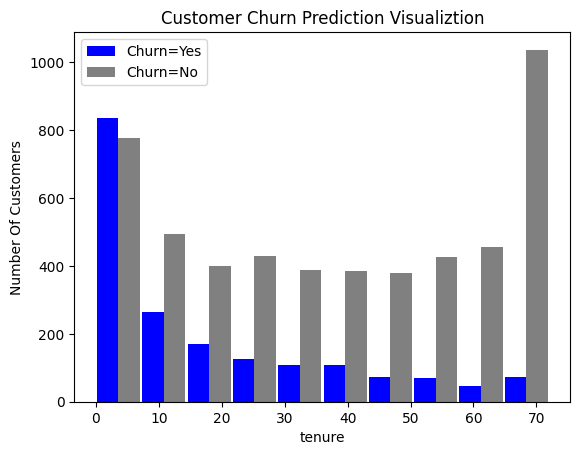

In [ ]:
churnno = df[df.Churn=='No'].tenure
churnyes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([churnyes, churnno], rwidth=0.95, color=['blue','grey'],label=['Churn=Yes','Churn=No'])
plt.legend()

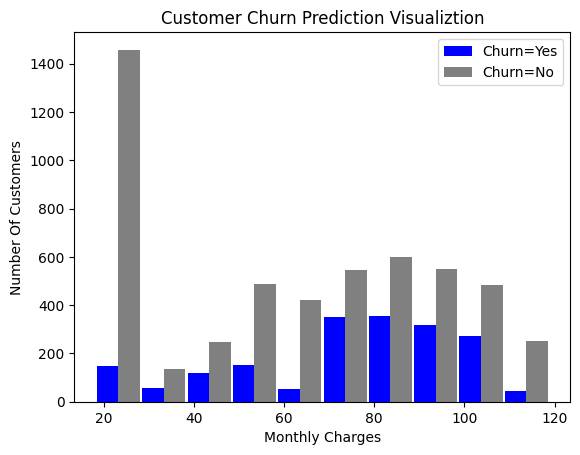

In [ ]:
churn_no = df[df.Churn=='No'].MonthlyCharges
churn_yes = df[df.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([churn_yes, churn_no], rwidth=0.95, color=['blue','grey'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values: {values}")
    print()

Column: gender
Unique Values: ['Female' 'Male']

Column: SeniorCitizen
Unique Values: [0 1]

Column: Partner
Unique Values: ['Yes' 'No']

Column: Dependents
Unique Values: ['No' 'Yes']

Column: tenure
Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: PhoneService
Unique Values: ['No' 'Yes']

Column: MultipleLines
Unique Values: ['No phone service' 'No' 'Yes']

Column: InternetService
Unique Values: ['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
Unique Values: ['No' 'Yes' 'No internet service']

Column: OnlineBackup
Unique Values: ['Yes' 'No' 'No internet service']

Column: DeviceProtection
Unique Values: ['No' 'Yes' 'No internet service']

Column: TechSupport
Unique Values: ['No' 'Yes' 'No internet service']

Column: StreamingTV
Unique Values: ['No' 'Yes' 'No internet service']

Column: 

In [ ]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
print(df['TotalCharges'].dtype)

float64


In [ ]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

In [ ]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [ ]:
df = df.dropna(subset=['TotalCharges'])

In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


In [ ]:
# Separate the majority and minority classes
data_majority = df[df['Churn'] == 0]
data_minority = df[df['Churn'] == 1]

# Undersample the majority class
data_majority_undersampled = resample(data_majority,
                                      replace=False,
                                      n_samples=1869,
                                      random_state=42)

# Combine the undersampled majority class with the minority class
data = pd.concat([data_majority_undersampled, data_minority])

print(data['Churn'].value_counts())

Churn
0    1869
1    1869
Name: count, dtype: int64


Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


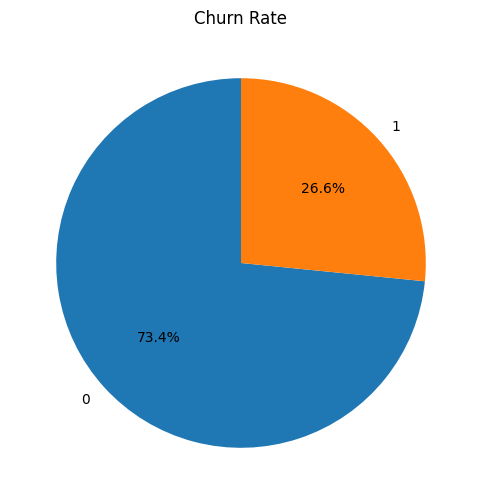

In [ ]:
churn_rate = df['Churn'].value_counts(normalize=True)
print(churn_rate)

# Pie chart for churn rate
plt.figure(figsize=(6, 6))
churn_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate')
plt.ylabel('')
plt.show()

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


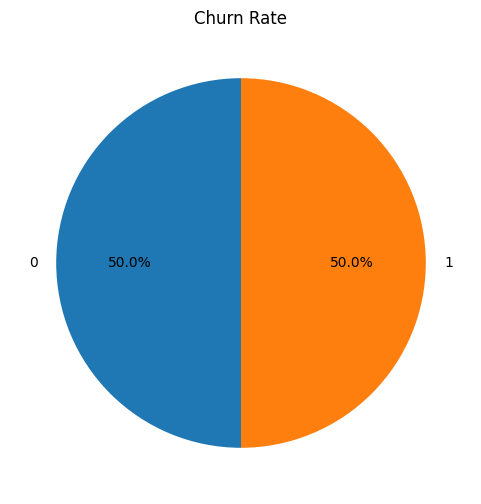

In [ ]:
churn_rate = data['Churn'].value_counts(normalize=True)
print(churn_rate)

# Pie chart for churn rate
plt.figure(figsize=(6, 6))
churn_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate')
plt.ylabel('')
plt.show()

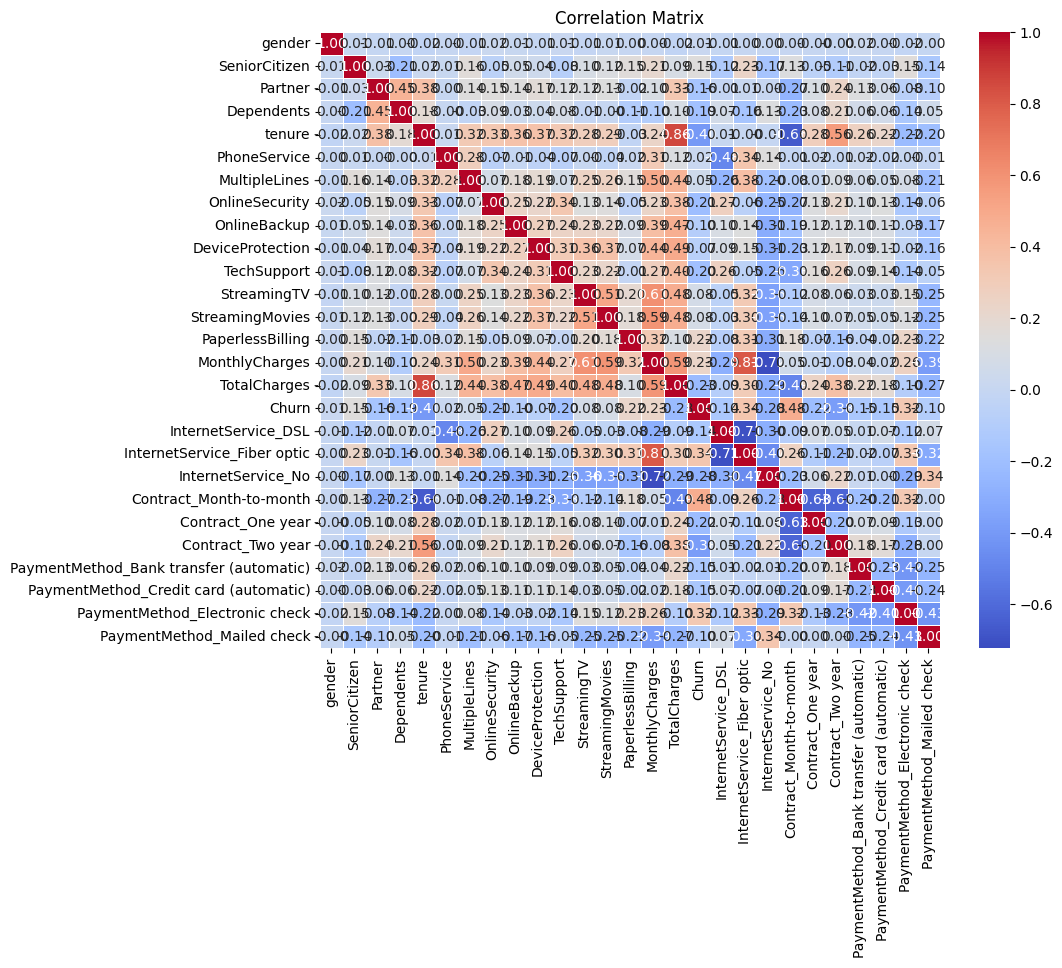

In [ ]:
# Compute the correlation matrix
corr = data.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


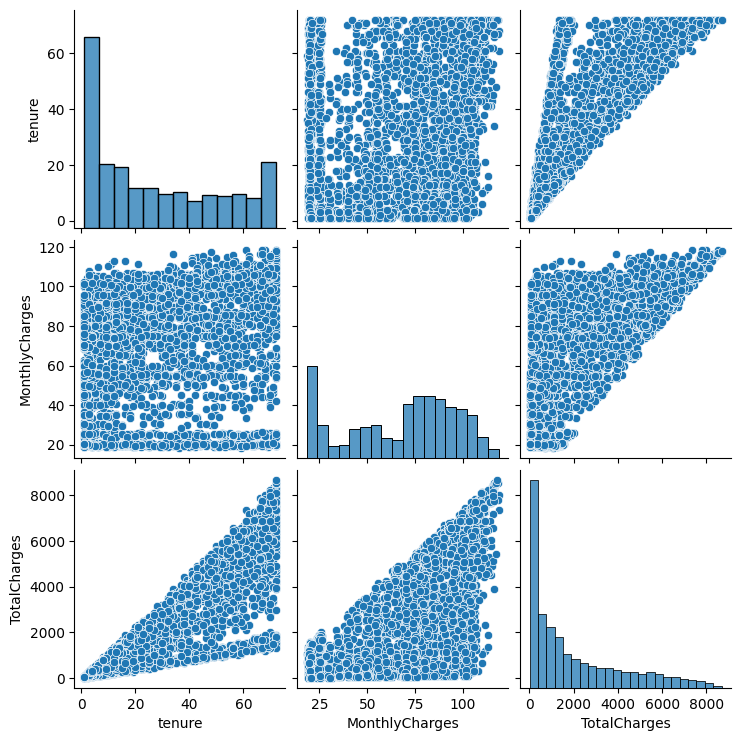

In [ ]:
# Select a subset of features to plot
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(data[selected_features])
plt.show()


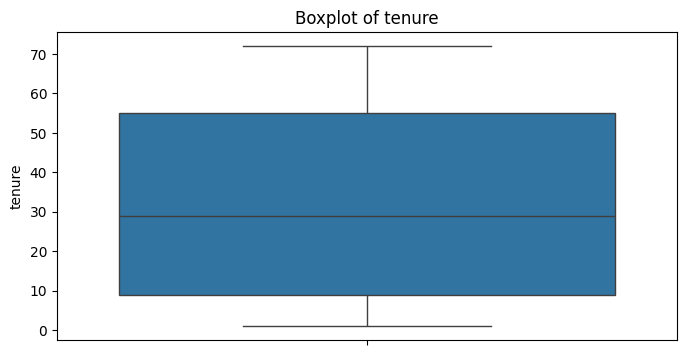

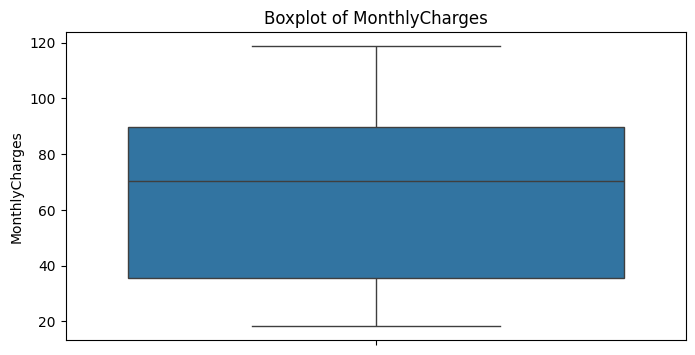

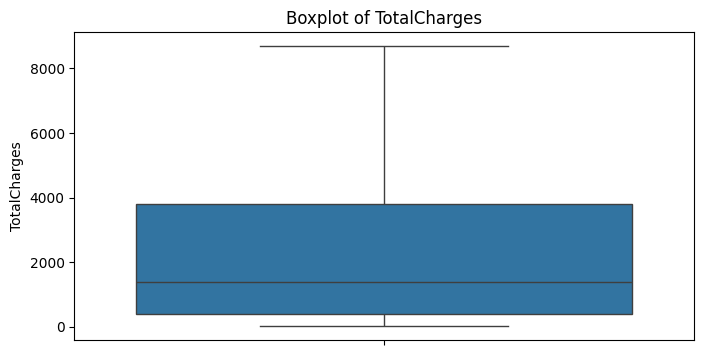

In [ ]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [ ]:
df.shape

(7032, 27)

In [ ]:
data.shape

(3738, 27)

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,0.464789,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,0.014085,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,0.619718,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,0.014085,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


model

Feature Importances:
gender: 0.0238146262060359
SeniorCitizen: 0.017015914692187255
Partner: 0.018389637216199066
Dependents: 0.0175978069526646
tenure: 0.10295891499528295
PhoneService: 0.00534041146064584
MultipleLines: 0.013577950500452688
OnlineSecurity: 0.01660804631337636
OnlineBackup: 0.015904082240355284
DeviceProtection: 0.012585774120842436
TechSupport: 0.015312165884154667
StreamingTV: 0.011642397815577729
StreamingMovies: 0.013516032145879917
PaperlessBilling: 0.021597872958117152
MonthlyCharges: 0.1780980447753924
TotalCharges: 0.17455937616214134
InternetService_DSL: 0.0034579760769716844
InternetService_Fiber optic: 0.042736843395765375
InternetService_No: 0.003924880532780084
Contract_Month-to-month: 0.22851998006761023
Contract_One year: 0.006088829031707817
Contract_Two year: 0.004534502734997904
PaymentMethod_Bank transfer (automatic): 0.01281129531570214
PaymentMethod_Credit card (automatic): 0.011336907815420393
PaymentMethod_Electronic check: 0.017344799749185576


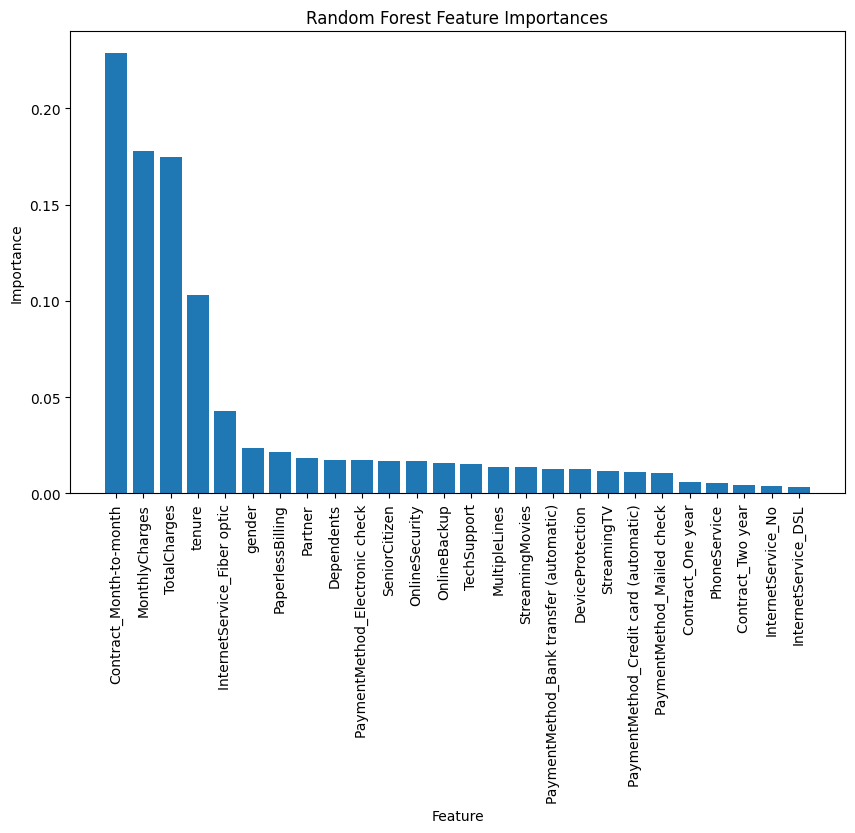

In [ ]:
# Define X_train and y_train
X_train = data.drop(columns=['Churn'])
y_train = data['Churn']

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Retrieve feature importances
feature_importances = rf.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature_name, importance in zip(X_train.columns, feature_importances):
    print(f"{feature_name}: {importance}")

# Plot feature importances
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

In [ ]:
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Define the FNN model
model = Sequential()

# Input layer
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5380 - loss: 0.8219 - val_accuracy: 0.7274 - val_loss: 0.6208
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6378 - loss: 0.6567 - val_accuracy: 0.7492 - val_loss: 0.5597
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6297 - loss: 0.6556 - val_accuracy: 0.7542 - val_loss: 0.5371
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6816 - loss: 0.6089 - val_accuracy: 0.7742 - val_loss: 0.5265
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7159 - loss: 0.5736 - val_accuracy: 0.7776 - val_loss: 0.5087
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7176 - loss: 0.5703 - val_accuracy: 0.7793 - val_loss: 0.4997
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7079 - loss: 0.5725 - val_accuracy: 0.7809 - val_loss: 0.4970
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7097 - loss: 0.5655 - val_accuracy: 0.7826 - val_loss:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7581 - loss: 0.4816 
Test Loss: 0.4914
Test Accuracy: 0.7447


In [ ]:
# Make predictions
fnn_predictions = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
# Convert probabilities to binary outcomes
# Predict using FNN model
fnn_predictions = model.predict(X_test)
fnn_predictions = (fnn_predictions > 0.5).astype(int)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


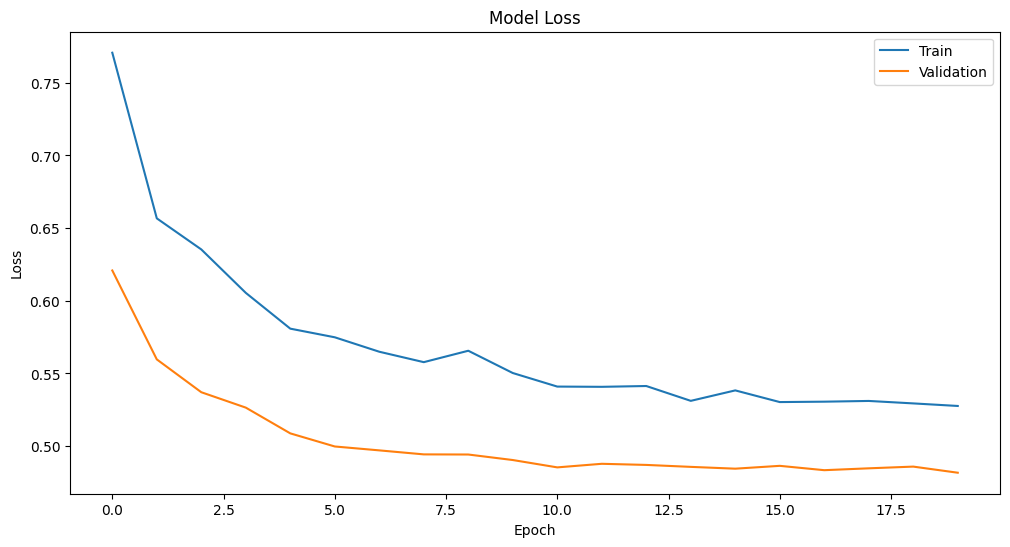

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

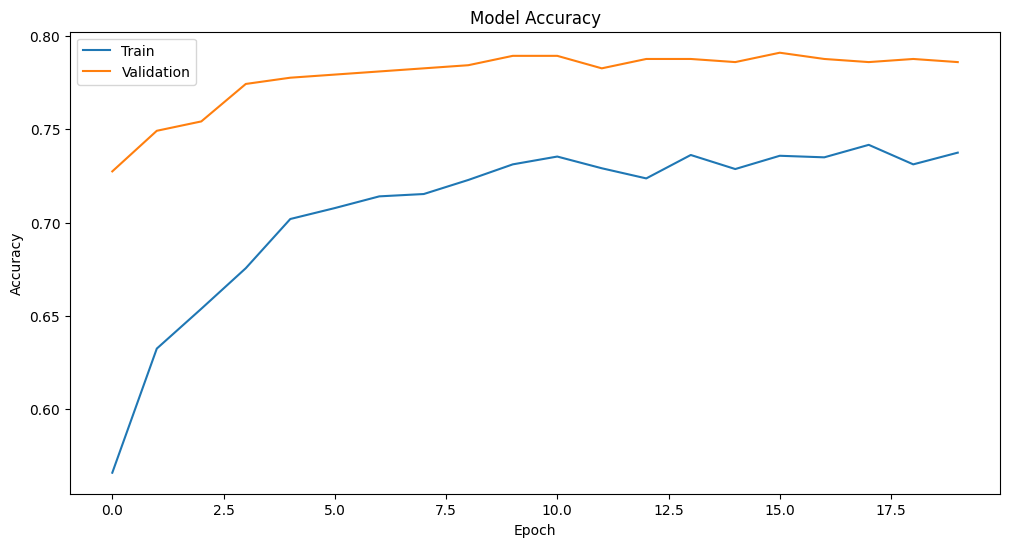

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
# Generate confusion matrices
conf_matrix_fnn = confusion_matrix(y_test, fnn_predictions)

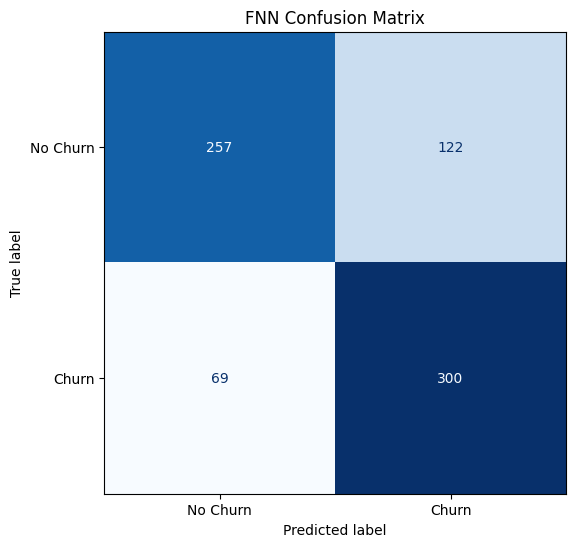

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

# FNN Confusion Matrix
disp_fnn = ConfusionMatrixDisplay(conf_matrix_fnn, display_labels=['No Churn', 'Churn'])
disp_fnn.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)  # No indexing needed for ax
ax.set_title('FNN Confusion Matrix')

plt.show()

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
rnnmodel = Sequential()

# Add layers to the model
rnnmodel.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
rnnmodel.add(Dropout(0.5))

rnnmodel.add(LSTM(units=64, return_sequences=True))
rnnmodel.add(Dropout(0.5))

rnnmodel.add(LSTM(units=32))
rnnmodel.add(Dropout(0.3))

rnnmodel.add(Dense(units=16, activation='relu'))
rnnmodel.add(Dense(units=1, activation='sigmoid'))

# Compile the model
rnnmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Reshape the input data for LSTM layers
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

In [ ]:
# Train the model
history = rnnmodel.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.5276 - loss: 0.6871 - val_accuracy: 0.6070 - val_loss: 0.6713
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.6363 - loss: 0.6504 - val_accuracy: 0.7140 - val_loss: 0.5765
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.7124 - loss: 0.5840 - val_accuracy: 0.7609 - val_loss: 0.5276
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.7377 - loss: 0.5535 - val_accuracy: 0.7676 - val_loss: 0.5174
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.7240 - loss: 0.5449 - val_accuracy: 0.7625 - val_loss: 0.5079
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.7240 - loss: 0.5474 - val_accuracy: 0.7625 - val_loss: 0.5064
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.7398 - loss: 0.5456 - val_accuracy: 0.7692 - val_loss: 0.5042
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.7292 - loss: 0.5422 - val_accuracy: 0.759

In [ ]:
# Evaluate the model
y_pred_prob = rnnmodel.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype('int32')

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


Confusion Matrix:
[[256 123]
 [ 65 304]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       379
           1       0.71      0.82      0.76       369

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.76      0.75      0.75       748



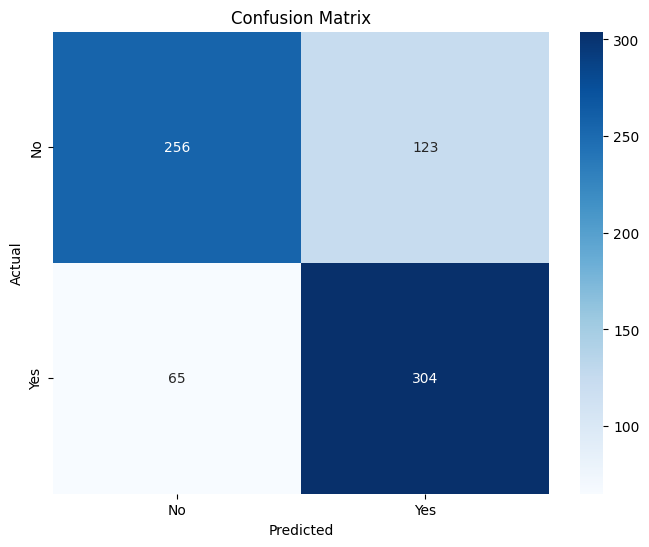

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

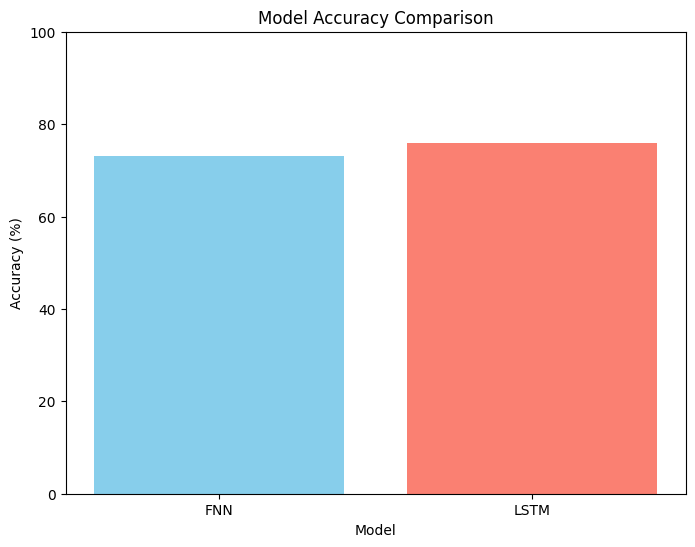

In [ ]:
accuracies = [73, 76]
models = ['FNN', 'LSTM']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'salmon'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict the test set
y_pred = log_reg.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.7687
Precision: 0.7513
Recall: 0.7940
F1-score: 0.7721


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-score: {f1_rf:.4f}")


Random Forest Accuracy: 0.7487
Random Forest Precision: 0.7315
Random Forest Recall: 0.7751
Random Forest F1-score: 0.7526


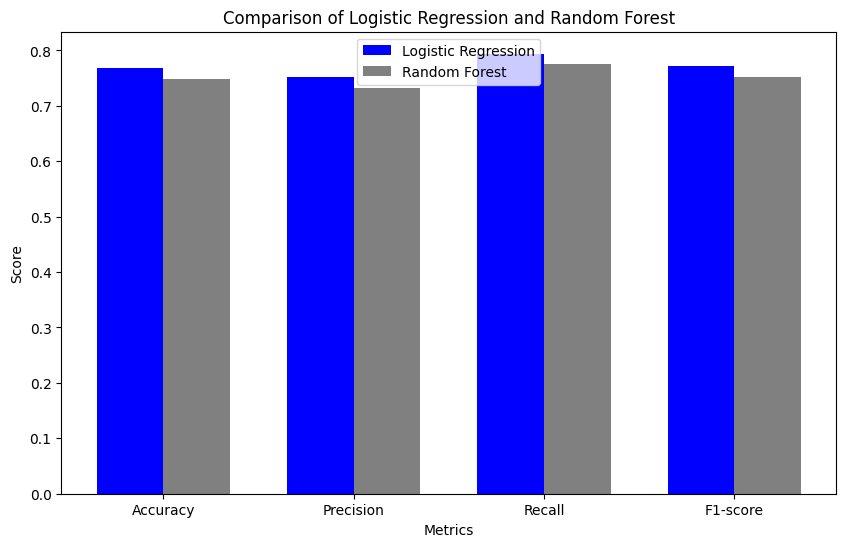

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
log_reg_metrics = [0.7687, 0.7513, 0.7940, 0.7721]
rf_metrics = [0.7487, 0.7315, 0.7751, 0.7526]

# Set up the bar width and positions
bar_width = 0.35
index = np.arange(len(metrics))

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, log_reg_metrics, bar_width, label='Logistic Regression', color='blue')
bar2 = ax.bar(index + bar_width, rf_metrics, bar_width, label='Random Forest', color='grey')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Comparison of Logistic Regression and Random Forest')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.show()


Despite Random Forest being a more complex model, Logistic Regression performed better for this particular dataset.